# Edulyt Project 2: Credit Banking Analysis

## Sriram Kumar
### Intern ID: EI01012

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing files

In [3]:
credit=pd.read_excel("E:\Edulyt Projects\Proj 2\credit_list.xlsx")

In [4]:
credit.head()

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,...,GTIN,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date,Spend Amount,Discount
0,1093,151,COMPUTERS,New,DCJRW,1363.08,1273.08,NaN,2014-04-03,0.956806,...,7223107,350818160,Barnes & Noble,EY1660,Prepaid card,55079,0,NaT,1363.08,NaN
1,1093,151,COMPUTERS,New,DCJRW,1363.08,1333.08,NM501,2014-03-12,0.741262,...,1143891,579612704,Barnes & Noble,EY1660,Debit card,18187,1,2014-03-19,1333.08,30.0
2,1093,198,KITCHEN & DINING,Refurbished,RGMIK,3643.75,3606.75,HW589,2014-01-28,0.169977,...,3452394,624342544,Nine West,RM9837,Credit card,60593,1,2014-02-04,3606.75,37.0
3,1093,715,COMPUTERS,Used,YEJZI,1827.63,1797.63,XB852,2014-03-28,0.695799,...,4512214,891861627,Road Runner Sports,MS6580,Mobile carrier Billing,83248,1,2014-04-04,1797.63,30.0
4,1093,151,COMPUTERS,New,DCJRW,1363.08,1335.08,PI538,2014-04-03,0.956806,...,7223107,350818160,Barnes & Noble,EY1660,Prepaid card,55079,1,2014-04-10,1335.08,28.0


In [5]:
customer=pd.read_excel("E:\Edulyt Projects\Proj 2\customer_info.xlsx")
customer.head()

,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address,Age Main
0,1093,leo@hotmail.com,LEO,9784589578,M,41,Phoenix,Arizona,Masked,41
1,1174,amy@yahoomail.com,AMY,9557690013,F,31,Seattle,Washington,Masked,31
2,1177,kimberly@hotmail.com,KIMBERLY,9575484585,F,84,Columbus,Ohio,Masked,84
3,1256,christina@gmail.com,CHRISTINA,8813991070,F,87,Las Vegas,Nevada,Masked,87
4,1418,miguel@gmail.com,MIGUEL,8883936622,M,35,Louisville,Kentucky,Masked,35


## 1. Grouping on the basis of Age

In [6]:
def age_group(a,g):
    if g=='F':
        if a>=18 and a<=35:
            return 'Young Females'
        elif a>=36 and a<=50:
            return 'Mid-age Females'
        else:
            return 'Old Females'
    else:
        if a>=18 and a<=35:
            return 'Young Males'
        elif a>=36 and a<=50:
            return 'Mid-age Males'
        else:
            return 'Old Males'

In [7]:
customer['Age_Group']=customer.apply(lambda x:age_group(x['Age Main'],x['Gender']),axis=1)

In [8]:
customer.head()

,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address,Age Main,Age_Group
0,1093,leo@hotmail.com,LEO,9784589578,M,41,Phoenix,Arizona,Masked,41,Mid-age Males
1,1174,amy@yahoomail.com,AMY,9557690013,F,31,Seattle,Washington,Masked,31,Young Females
2,1177,kimberly@hotmail.com,KIMBERLY,9575484585,F,84,Columbus,Ohio,Masked,84,Old Females
3,1256,christina@gmail.com,CHRISTINA,8813991070,F,87,Las Vegas,Nevada,Masked,87,Old Females
4,1418,miguel@gmail.com,MIGUEL,8883936622,M,35,Louisville,Kentucky,Masked,35,Young Males


In [9]:
customer['Spend_Amt']=credit.groupby('Credit_card')['Spend Amount'].sum().reset_index()['Spend Amount']

In [10]:
customer['Swipes']=credit.groupby('Credit_card').count().reset_index()['Spend Amount']

In [11]:
customer.head()

,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address,Age Main,Age_Group,Spend_Amt,Swipes
0,1093,leo@hotmail.com,LEO,9784589578,M,41,Phoenix,Arizona,Masked,41,Mid-age Males,56535.780,28
1,1174,amy@yahoomail.com,AMY,9557690013,F,31,Seattle,Washington,Masked,31,Young Females,154046.055,49
2,1177,kimberly@hotmail.com,KIMBERLY,9575484585,F,84,Columbus,Ohio,Masked,84,Old Females,156280.670,49
3,1256,christina@gmail.com,CHRISTINA,8813991070,F,87,Las Vegas,Nevada,Masked,87,Old Females,190327.900,105
4,1418,miguel@gmail.com,MIGUEL,8883936622,M,35,Louisville,Kentucky,Masked,35,Young Males,115323.460,49


### 1.1 Spend amount per Age Group

In [12]:
Spnd_age=customer.groupby('Age_Group').sum()['Spend_Amt'].sort_values(ascending=False).reset_index()
Spnd_age

,Age_Group,Spend_Amt
0,Old Females,1.028062e+07
1,Old Males,8.452336e+06
2,Young Males,3.138927e+06
3,Young Females,2.646789e+06
4,Mid-age Females,1.079320e+06
5,Mid-age Males,6.522626e+05


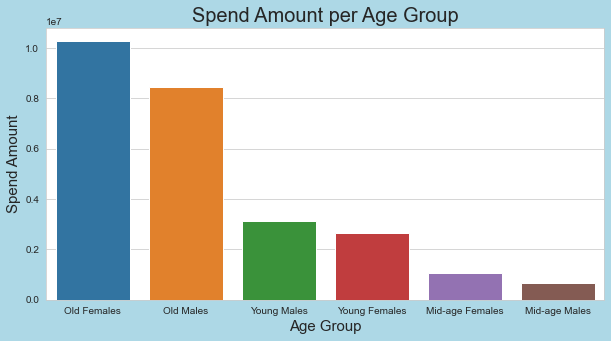

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize= (10,5),facecolor='lightblue')
plt.title('Spend Amount per Age Group',fontsize=20)
sns.barplot(data=Spnd_age, x='Age_Group',y='Spend_Amt')
plt.xlabel('Age Group',fontsize=15)
plt.ylabel('Spend Amount',fontsize=15)
plt.show()

### 1.2 Swipes per Age Group

In [14]:
swp_age=customer.groupby('Age_Group').sum()['Swipes'].sort_values(ascending=False).reset_index()
swp_age

,Age_Group,Swipes
0,Old Females,3863
1,Old Males,3176
2,Young Males,1264
3,Young Females,1021
4,Mid-age Females,398
5,Mid-age Males,272


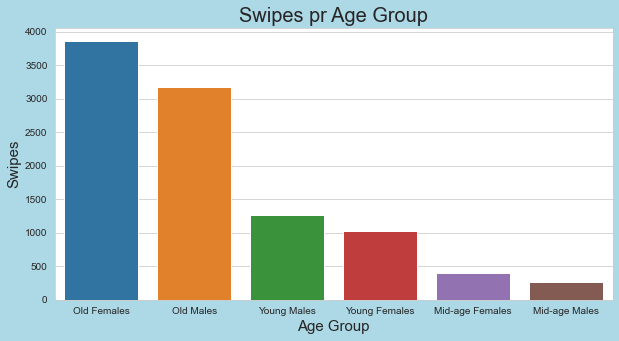

In [15]:
plt.figure(figsize= (10,5),facecolor='lightblue')
plt.title('Swipes pr Age Group',fontsize=20)
sns.barplot(data=swp_age, x='Age_Group',y='Swipes')
plt.xlabel('Age Group',fontsize=15)
plt.ylabel('Swipes',fontsize=15)
plt.show()

### ____________________________________________________________________________________________________________________________

## 2. Spend in terms of Product, State and Payment method

### 2.1 Spend Amount per Product category

In [16]:
Spnd_Prod=credit.groupby('P_CATEGORY').sum()['Spend Amount'].sort_values(ascending=False).reset_index()
Spnd_Prod

,P_CATEGORY,Spend Amount
0,DECOR,3.199401e+06
1,COMPUTERS,3.060817e+06
2,ELECTRONICS,2.683993e+06
3,OFFICE SUPPLIES,2.465481e+06
4,SHOES,2.296989e+06
5,KITCHEN & DINING,2.017056e+06
6,CLOTHING,1.971971e+06
7,BEDDING,1.660588e+06
8,GAMES,1.515089e+06
9,APPLIANCES,1.509852e+06


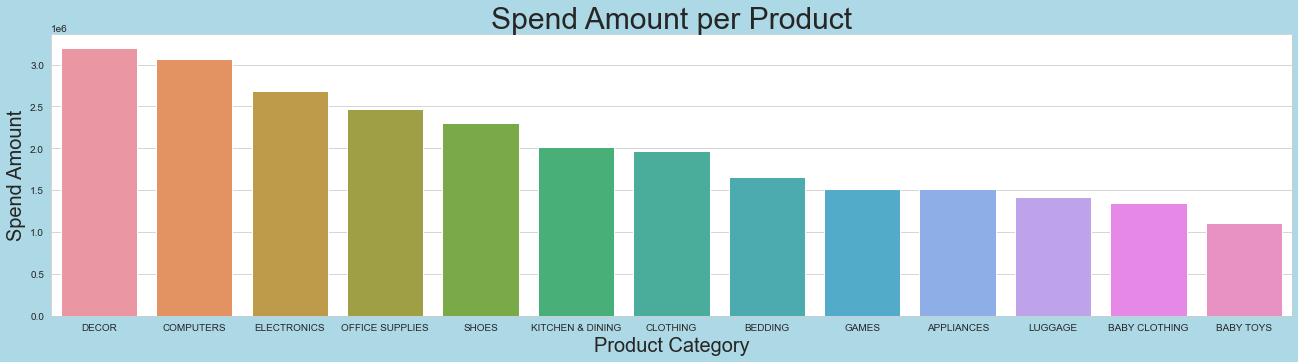

In [17]:
plt.figure(figsize= (18,5),facecolor='lightblue')
plt.title('Spend Amount per Product',fontsize=30)
sns.barplot(data=Spnd_Prod, x='P_CATEGORY',y='Spend Amount')
plt.tight_layout()
plt.xlabel('Product Category',fontsize=20)
plt.ylabel('Spend Amount',fontsize=20)
plt.show()

### 2.2 Spend Amount per State

In [18]:
Spnd_State=customer.groupby('State').sum()['Spend_Amt'].sort_values(ascending=False).reset_index()
Spnd_State

,State,Spend_Amt
0,California,7.589398e+06
1,Texas,5.509295e+06
2,Kentucky,2.179944e+06
3,Washington,2.121857e+06
4,Illinois,2.006161e+06
5,Massachusetts,1.743437e+06
6,Nevada,1.689787e+06
7,Arizona,1.605134e+06
8,Ohio,1.026222e+06
9,Missouri,7.790177e+05


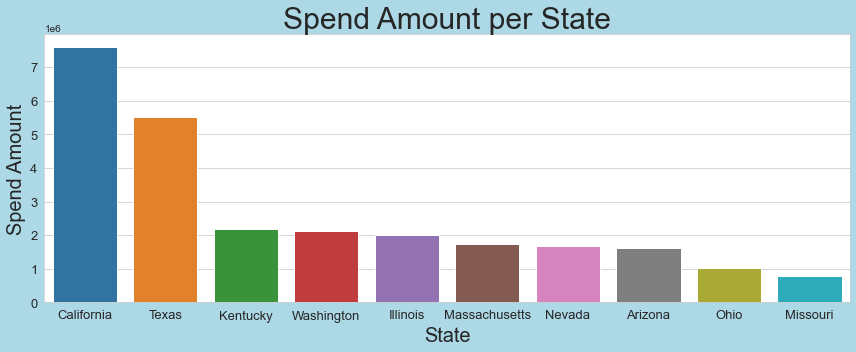

In [19]:
plt.figure(figsize= (12,5),facecolor='lightblue')
plt.title('Spend Amount per State',fontsize=30)
sns.barplot(data=Spnd_State, x='State',y='Spend_Amt')
plt.xlabel('State',fontsize=20)
plt.ylabel('Spend Amount',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

### 2.3 Spend Amount per Payment Method

In [20]:
Spnd_Pymtd=credit.groupby('Payment Method').sum()['Spend Amount'].sort_values(ascending=False).reset_index()
Spnd_Pymtd

,Payment Method,Spend Amount
0,Mobile carrier Billing,1.084781e+07
1,Credit card,9.522582e+06
2,Prepaid card,4.498367e+06
3,Debit card,8.307461e+05
4,Paypal wallet,2.236580e+05
5,Gift card,1.820680e+05
6,Deirect debits,1.535727e+05


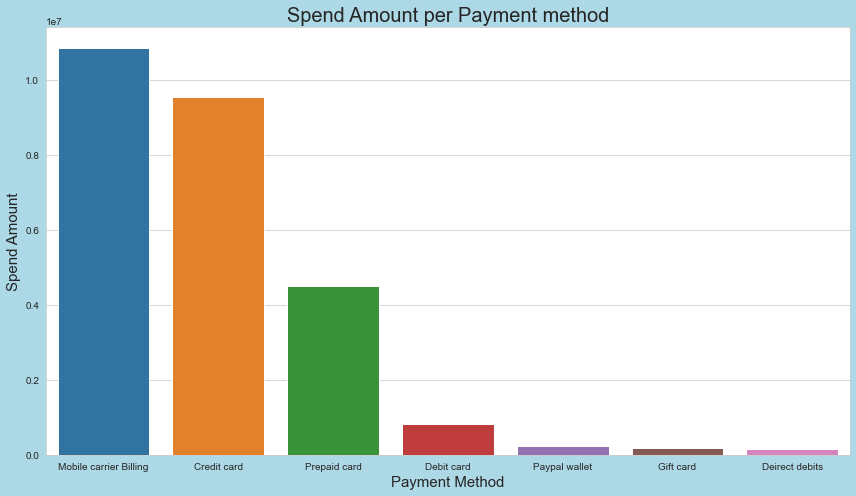

In [21]:
plt.figure(figsize= (12,7),facecolor='lightblue')
plt.title('Spend Amount per Payment method',fontsize=20)
sns.barplot(data=Spnd_Pymtd, x='Payment Method',y='Spend Amount')
plt.xlabel('Payment Method',fontsize=15)
plt.ylabel('Spend Amount',fontsize=15)
plt.tight_layout()
plt.show()

### ____________________________________________________________________________________________________________________________

## 3. Highest Spending

### 3.1 Five highest spending Product category

In [22]:
credit.groupby('P_CATEGORY').sum()['Spend Amount'].sort_values(ascending=False).reset_index().head(5)

,P_CATEGORY,Spend Amount
0,DECOR,3.199401e+06
1,COMPUTERS,3.060817e+06
2,ELECTRONICS,2.683993e+06
3,OFFICE SUPPLIES,2.465481e+06
4,SHOES,2.296989e+06


### 3.2 Five highest spending State

In [23]:
customer.groupby('State').sum()['Spend_Amt'].sort_values(ascending=False).reset_index().head(5)

,State,Spend_Amt
0,California,7.589398e+06
1,Texas,5.509295e+06
2,Kentucky,2.179944e+06
3,Washington,2.121857e+06
4,Illinois,2.006161e+06


### 3.3 Five highest spending Payment method

In [24]:
credit.groupby('Payment Method').sum()['Spend Amount'].sort_values(ascending=False).reset_index().head(5)

,Payment Method,Spend Amount
0,Mobile carrier Billing,1.084781e+07
1,Credit card,9.522582e+06
2,Prepaid card,4.498367e+06
3,Debit card,8.307461e+05
4,Paypal wallet,2.236580e+05


### ____________________________________________________________________________________________________________________________

## 4. Return category insights

In [25]:
df=credit.groupby('Credit_card').sum()['Return_ind'].reset_index()

### 4.1 No. of returns per State

In [26]:
df1=df
df1['State']=customer['State']

In [27]:
dff1=df1.groupby('State').sum()['Return_ind'].sort_values(ascending=False).reset_index()
dff1

,State,Return_ind
0,California,450
1,Texas,297
2,Illinois,122
3,Washington,120
4,Kentucky,118
5,Massachusetts,114
6,Arizona,104
7,Nevada,101
8,Ohio,54
9,Missouri,52


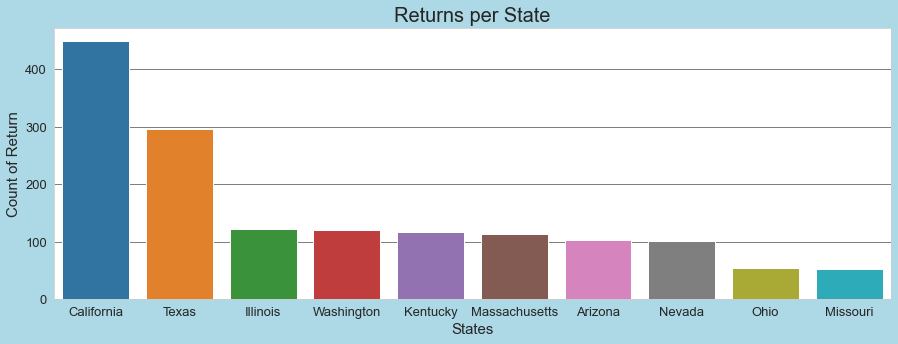

In [28]:
plt.figure(figsize=(15,5),facecolor='lightblue')
plt.grid(color='black',linewidth=0.5)
sns.barplot(data=dff1, x='State',y='Return_ind')
plt.xlabel('States',fontsize=15)
plt.ylabel('Count of Return',fontsize=15)
plt.title('Returns per State',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

### 4.2 No. of returns per Age Group

In [29]:
df2=df
df2['Age_Group']=customer['Age_Group']

In [30]:
dff2=df2.groupby('Age_Group').sum()['Return_ind'].sort_values(ascending=False).reset_index()
dff2

,Age_Group,Return_ind
0,Old Females,596
1,Old Males,484
2,Young Males,188
3,Young Females,162
4,Mid-age Females,62
5,Mid-age Males,40


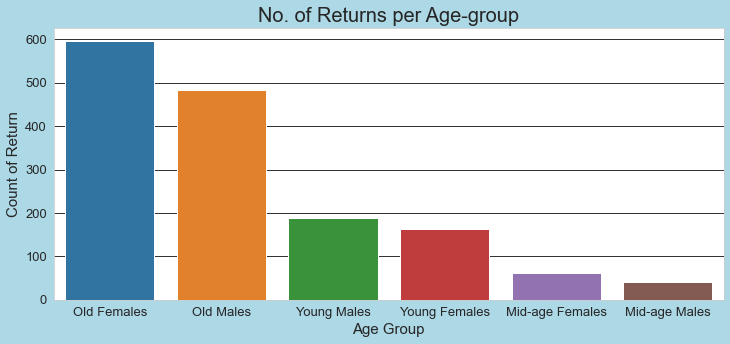

In [31]:
plt.figure(figsize=(12,5),facecolor='lightblue')
plt.grid(color='black')
sns.barplot(data=dff2,x='Age_Group', y='Return_ind')
plt.title('No. of Returns per Age-group',fontsize=20)
plt.ylabel('Count of Return',fontsize=15)
plt.xlabel('Age Group',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

### 4.3 No. of Returns per Product condition

In [32]:
cnd=credit.groupby('CONDTION').sum()['Return_ind'].sort_values(ascending=False).reset_index()
cnd

,CONDTION,Return_ind
0,New,712
1,Used,433
2,Refurbished,387


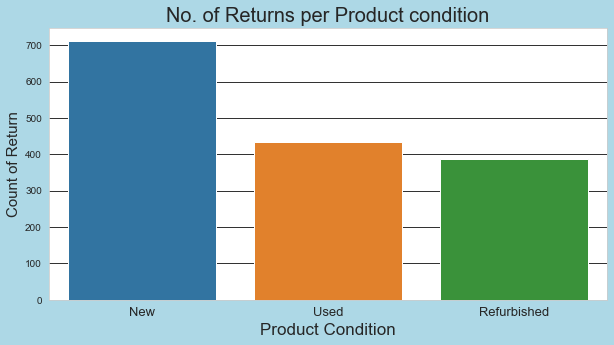

In [33]:
plt.figure(figsize=(10,5),facecolor='lightblue')
plt.grid(color='black')
sns.barplot(data=cnd,x='CONDTION', y='Return_ind')
plt.title('No. of Returns per Product condition',fontsize=20)
plt.ylabel('Count of Return',fontsize=15)
plt.xlabel('Product Condition',fontsize=17)
plt.xticks(fontsize=13)
plt.show()

### 4.4 No. of Returns per Product category

In [34]:
pct=credit.groupby('P_CATEGORY').sum()['Return_ind'].sort_values(ascending=False).reset_index()
pct

,P_CATEGORY,Return_ind
0,DECOR,182
1,COMPUTERS,171
2,ELECTRONICS,159
3,SHOES,141
4,OFFICE SUPPLIES,122
5,KITCHEN & DINING,120
6,CLOTHING,119
7,GAMES,113
8,LUGGAGE,95
9,APPLIANCES,92


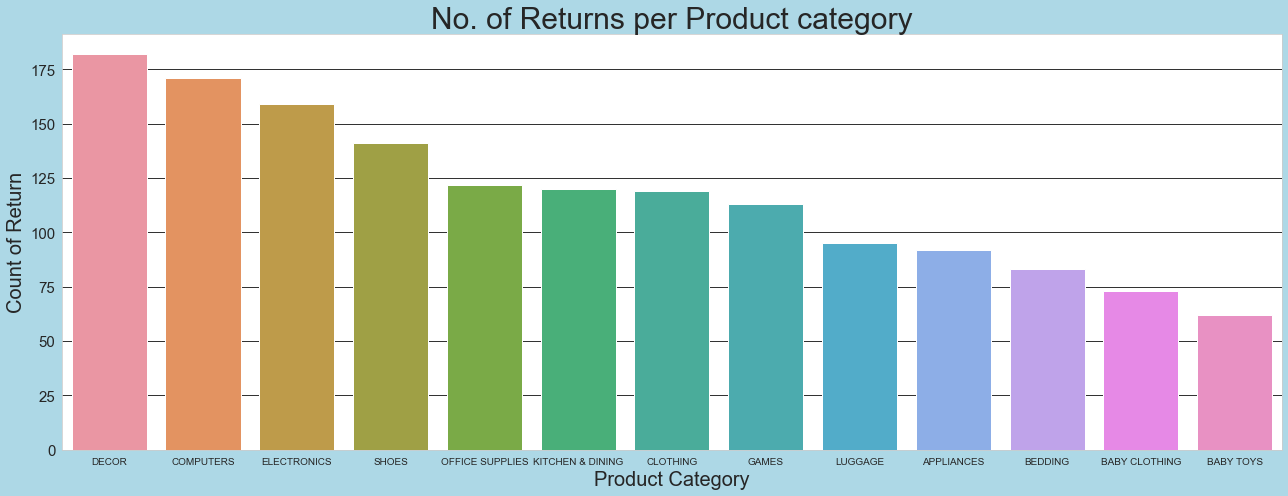

In [35]:
plt.figure(figsize=(18,7),facecolor='lightblue')
plt.grid(color='black')
sns.barplot(data=pct,x='P_CATEGORY', y='Return_ind')
plt.title('No. of Returns per Product category',fontsize=30)
plt.ylabel('Count of Return',fontsize=20)
plt.xlabel('Product Category',fontsize=20)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

### 4.5 No. of Returns per Discount value

In [36]:
dct=credit.groupby('Discount').sum()['Return_ind'].sort_values(ascending=False).reset_index()
dct

,Discount,Return_ind
0,26.0000,59
1,23.0000,49
2,29.0000,47
3,37.0000,47
4,44.0000,46
...,...,...
119,153.0940,0
120,163.8870,0
121,164.6595,0
122,19.6795,0


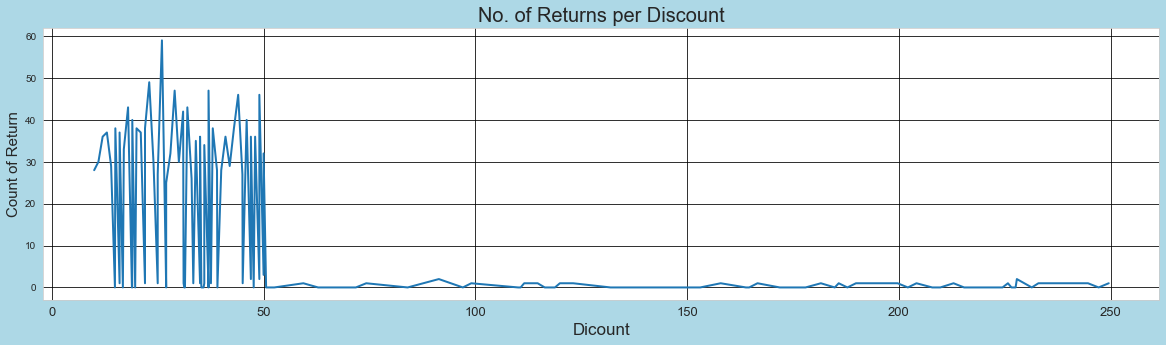

In [37]:
plt.figure(figsize=(20,5),facecolor='lightblue')
plt.grid(color='black')
sns.lineplot(data=dct,x='Discount', y='Return_ind',linewidth=2)
plt.title('No. of Returns per Discount',fontsize=20)
plt.ylabel('Count of Return',fontsize=15)
plt.xlabel('Dicount',fontsize=17)
plt.xticks(fontsize=13)
plt.show()

### ____________________________________________________________________________________________________________________________

## 5. Most Ordering Hour

In [38]:
hr=credit.groupby('Hour').count()['Credit_card'].sort_values(ascending=False).reset_index()
hr

,Hour,Credit_card
0,11,553
1,17,511
2,12,488
3,3,482
4,7,476
5,21,462
6,8,462
7,22,448
8,18,446
9,23,441


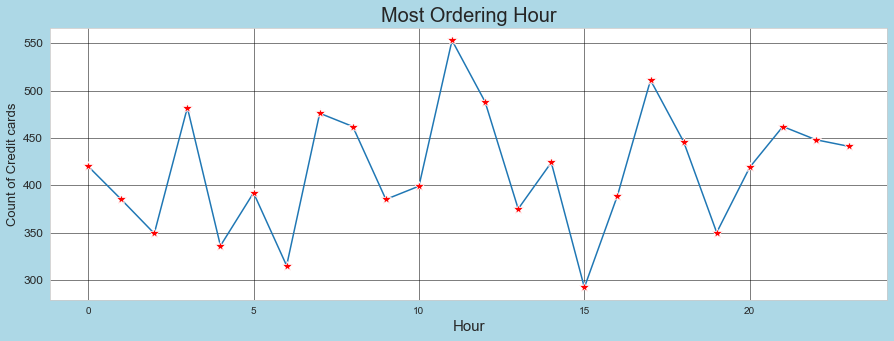

In [39]:
plt.figure(figsize=(15,5),facecolor='lightblue')
plt.grid(color='black',linewidth=0.5)
sns.lineplot(data=hr,x='Hour',y='Credit_card',marker='*',markersize=10,markerfacecolor='r')
plt.xlabel('Hour',fontsize=15)
plt.ylabel('Count of Credit cards',fontsize=13)
plt.title('Most Ordering Hour',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

### ____________________________________________________________________________________________________________________________

## 6. Most discounted Payment methods

In [40]:
Dpm=credit.groupby('Payment Method').sum()['Discount'].sort_values(ascending=False).reset_index()
Dpm

,Payment Method,Discount
0,Mobile carrier Billing,127941.7350
1,Credit card,115606.7720
2,Prepaid card,49163.7380
3,Debit card,9836.6830
4,Paypal wallet,2381.0000
5,Deirect debits,2358.6795
6,Gift card,2033.6880


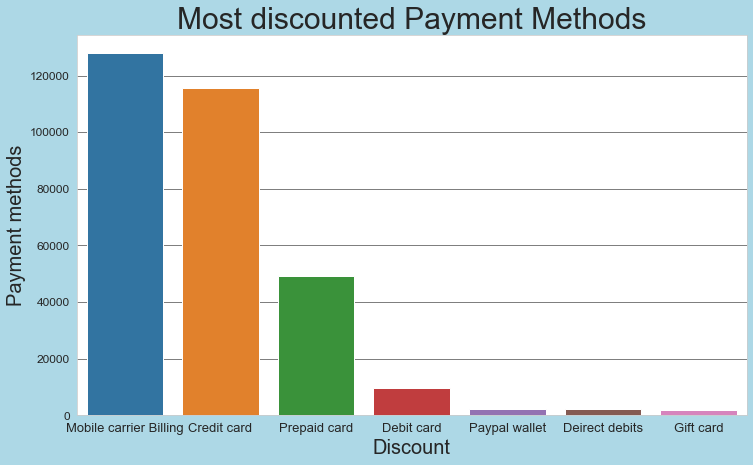

In [41]:
plt.figure(figsize=(12,7),facecolor='lightblue')
plt.grid(color='black',linewidth=0.5)
sns.barplot(data=Dpm, x='Payment Method',y='Discount')
plt.title('Most discounted Payment Methods',fontsize=30)
plt.xlabel('Discount',fontsize=20)
plt.ylabel('Payment methods',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.show()

### ____________________________________________________________________________________________________________________________

## 7. Distribution of products on basis of Price

In [42]:
mean=credit['Spend Amount'].mean()

In [43]:
credit['Value type']=credit['Spend Amount'].apply(lambda x:'High Value' if x>=mean else 'Low Value')

In [44]:
credit.head()

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,...,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date,Spend Amount,Discount,Value type
0,1093,151,COMPUTERS,New,DCJRW,1363.08,1273.08,NaN,2014-04-03,0.956806,...,350818160,Barnes & Noble,EY1660,Prepaid card,55079,0,NaT,1363.08,NaN,Low Value
1,1093,151,COMPUTERS,New,DCJRW,1363.08,1333.08,NM501,2014-03-12,0.741262,...,579612704,Barnes & Noble,EY1660,Debit card,18187,1,2014-03-19,1333.08,30.0,Low Value
2,1093,198,KITCHEN & DINING,Refurbished,RGMIK,3643.75,3606.75,HW589,2014-01-28,0.169977,...,624342544,Nine West,RM9837,Credit card,60593,1,2014-02-04,3606.75,37.0,High Value
3,1093,715,COMPUTERS,Used,YEJZI,1827.63,1797.63,XB852,2014-03-28,0.695799,...,891861627,Road Runner Sports,MS6580,Mobile carrier Billing,83248,1,2014-04-04,1797.63,30.0,Low Value
4,1093,151,COMPUTERS,New,DCJRW,1363.08,1335.08,PI538,2014-04-03,0.956806,...,350818160,Barnes & Noble,EY1660,Prepaid card,55079,1,2014-04-10,1335.08,28.0,Low Value


### 7.1 Count of Value types

In [45]:
credit.groupby('Value type').count()['Credit_card']

Value type
High Value    5270
Low Value     4729
Name: Credit_card, dtype: int64

### 7.2 Sum of Prices of Value types

In [46]:
np.round(credit.groupby('Value type').sum()['Spend Amount'],2)

Value type
High Value    19929223.74
Low Value      6329585.14
Name: Spend Amount, dtype: float64

### ____________________________________________________________________________________________________________________________

## 8. Comparison between No. of Orders and Discounts

In [47]:
tbl=credit.groupby('Merchant_name').count()[['Credit_card','Discount']].sort_values(by=['Credit_card'],ascending=False)
tbl

,Credit_card,Discount
Merchant_name,,
Barnes & Noble,776,774
L'Occitane,690,687
Ulta,684,684
Guitar Center,642,639
The Vitamin Shoppe,622,622
Cole Hardware,594,593
DODOcase,578,577
The North Face,574,571
REI,560,560


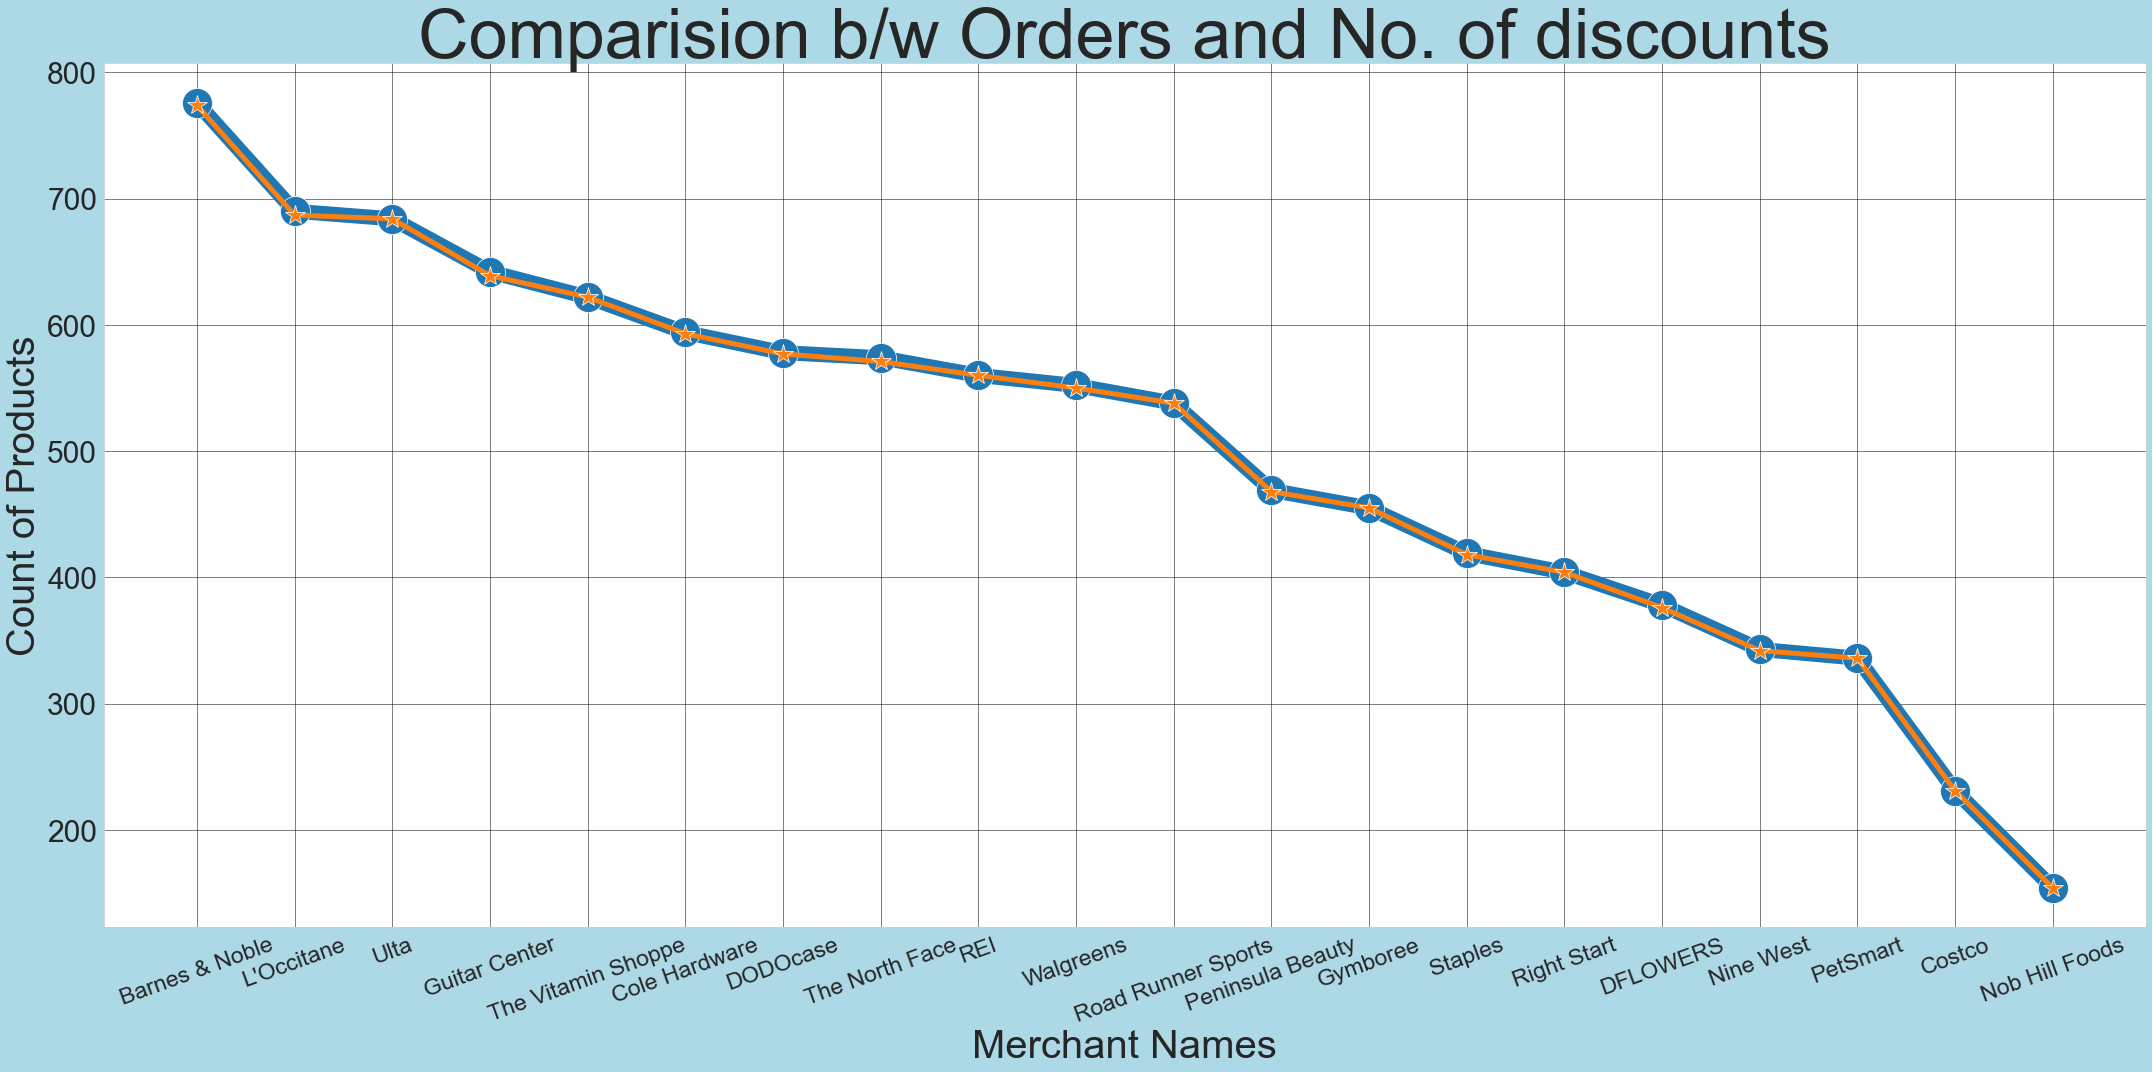

In [50]:
plt.figure(figsize=(30,15),facecolor='lightblue')
plt.grid(color='black',linewidth=0.5)
plt.title('Comparision b/w Orders and No. of discounts',fontsize=70)
sns.lineplot(data=tbl,x='Merchant_name',y='Credit_card',linewidth=15,marker='o',markersize=30)
sns.lineplot(data=tbl,x='Merchant_name',y='Discount',linewidth=5,marker='*',markersize=20)
plt.ylabel('Count of Products',fontsize=40)
plt.xlabel('Merchant Names',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(rotation=20,fontsize=23)
plt.tight_layout()
plt.show()

### Insights from Graph:
As we can observe from the graph, that on sorting Merchant's names in descending order, in the recent table as per Count of Orders, the No. of Discount column itself gets sorted in same descending way
Thus from the observation we can state that, on increasing number of discounted products, Number of orders per Merchant also increases.

## _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _Thank You_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 